# Dados SNIS 2019

In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_and_clean(nome_arquivo):
    df = pd.read_csv(nome_arquivo, sep=";")
    
    # As colunas ficaram movidas, entao iremos fazer drop na ultima coluna e renomear todas as colunas
    new_columns = list(df.columns)[1:]
    
    df = df.drop([
        'TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051)'],
        axis=1)
    
    df.columns = new_columns 
    
    # há muitas colunas com values 0 e '0', vamos substituir por nan
    df = df.replace(0, np.nan)
    df = df.replace("0", np.nan)
    df = df.replace("0,00", np.nan)
    return df

In [3]:
df = load_and_clean('novo2.csv')

In [4]:
df.head()

,Código do Município,Município,Estado,Ano de Referência,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,...,QD009 - Quantidade de amostras para turbidez fora do padrão,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051)
1200013,120001,Acrelândia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água,Autarquia,"663.546,06","663.546,06",NaN,...,112.0,NaN,NaN,365.0,"3.650,00",568,464,"6.336,00",NaN,NaN
1200054,120005,Assis Brasil,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"723.713,71","723.713,71",NaN,...,NaN,NaN,NaN,12.0,"730,00",515,491,"6.336,00",4.0,NaN
1200104,120010,Brasiléia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"1.984.882,66","1.984.882,66",NaN,...,NaN,NaN,NaN,365.0,"2.190,00",1.059,1.001,"14.784,00",3.0,NaN
1200138,120013,Bujari,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"647.261,88","647.261,88",NaN,...,109.0,NaN,NaN,365.0,"4.380,00",177,155,"6.336,00",2.0,NaN
1200179,120017,Capixaba,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"602.726,79","602.726,79",NaN,...,55.0,NaN,NaN,12.0,"5.110,00",235,216,"4.224,00",1.0,NaN


In [5]:
df_population = pd.read_excel(
    'estimativa_dou_2019.xls', dtype='str', skiprows=1).drop([
    'COD. UF', 'COD. MUNIC'], axis=1).rename(columns={'NOME DO MUNICÍPIO' : 'Município', 'UF': 'Estado'})
df_population.head()

,Estado,Município,POPULAÇÃO ESTIMADA
0,RO,Alta Floresta D'Oeste,22945
1,RO,Ariquemes,107863
2,RO,Cabixi,5312
3,RO,Cacoal,85359
4,RO,Cerejeiras,16323


# Merge no df SNIS com o df de populacao

In [6]:
df_SNIS_pop = df.merge(df_population, how='left', on=['Município', 'Estado'])
df_SNIS_pop.head()

,Código do Município,Município,Estado,Ano de Referência,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
0,120001,Acrelândia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água,Autarquia,"663.546,06","663.546,06",NaN,...,NaN,NaN,365.0,"3.650,00",568,464,"6.336,00",NaN,NaN,15256
1,120005,Assis Brasil,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"723.713,71","723.713,71",NaN,...,NaN,NaN,12.0,"730,00",515,491,"6.336,00",4.0,NaN,7417
2,120010,Brasiléia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"1.984.882,66","1.984.882,66",NaN,...,NaN,NaN,365.0,"2.190,00",1.059,1.001,"14.784,00",3.0,NaN,26278
3,120013,Bujari,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"647.261,88","647.261,88",NaN,...,NaN,NaN,365.0,"4.380,00",177,155,"6.336,00",2.0,NaN,10266
4,120017,Capixaba,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"602.726,79","602.726,79",NaN,...,NaN,NaN,12.0,"5.110,00",235,216,"4.224,00",1.0,NaN,11733


vamos descartar as colunas que possuem mais de 5000 nan

In [7]:
df_SNIS_pop = df_SNIS_pop.loc[:, (df_SNIS_pop.isnull().sum(axis=0)) < 5000]
df_SNIS_pop.head()

,Código do Município,Município,Estado,Ano de Referência,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
0,120001,Acrelândia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água,Autarquia,"663.546,06","663.546,06",NaN,...,NaN,NaN,365.0,"3.650,00",568,464,"6.336,00",NaN,NaN,15256
1,120005,Assis Brasil,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"723.713,71","723.713,71",NaN,...,NaN,NaN,12.0,"730,00",515,491,"6.336,00",4.0,NaN,7417
2,120010,Brasiléia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"1.984.882,66","1.984.882,66",NaN,...,NaN,NaN,365.0,"2.190,00",1.059,1.001,"14.784,00",3.0,NaN,26278
3,120013,Bujari,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"647.261,88","647.261,88",NaN,...,NaN,NaN,365.0,"4.380,00",177,155,"6.336,00",2.0,NaN,10266
4,120017,Capixaba,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"602.726,79","602.726,79",NaN,...,NaN,NaN,12.0,"5.110,00",235,216,"4.224,00",1.0,NaN,11733


In [8]:
# vamos descartar as rows com mais de 30 nan e a coluna "codigo do municipio"
df_SNIS_pop = df_SNIS_pop.dropna(thresh=30).drop(['Código do Município', 'Ano de Referência'], axis=1)
df_SNIS_pop.head()

,Município,Estado,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,FN004 - Receita operacional indireta,FN005 - Receita operacional total (direta + indireta),...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
15,Rio Branco,AC,[12004000] Departamento Estadual de Pavimentaç...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta,"47.213.039,47","38.247.595,47","8.965.444,00","421.632,30","47.634.671,77",...,NaN,NaN,2.3,"38.790,00",15.364,11.688,"54.912,00",12.0,22.0,407319
23,Anadia,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água,Sociedade de economia mista com administração ...,"1.646.496,24","1.646.496,24",NaN,"99.912,05","1.746.408,29",...,NaN,NaN,8.0,"88,00",2.715,2.663,"800,00",NaN,NaN,17545
24,Arapiraca,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,"52.839.484,70","52.309.070,31","530.414,39","4.158.027,15","56.997.511,85",...,158.0,"7.584,00",NaN,NaN,7.504,6.099,"292.752,00",5.0,5.0,231747
27,Barra de São Miguel,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,"5.106.808,70","4.986.971,89","119.836,81","380.497,77","5.487.306,47",...,NaN,NaN,NaN,NaN,1.368,1.285,"1.501,76",1.0,NaN,8322
28,Batalha,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,"3.175.641,43","2.102.583,93","1.073.057,50","240.809,34","3.416.450,77",...,14.0,"1.022,00",121.0,"1.937,00",1.080,1.080,"28.080,00",3.0,NaN,18232


In [9]:
df_SNIS_pop = df_SNIS_pop.dropna(subset=['POPULAÇÃO ESTIMADA'])

Exportamos os dados operacionais para um csv

df_SNIS_pop[['Município', 'Estado', 'Prestadores', 'Serviços', 
          'Natureza Jurídica', 
          'QD011 - Quantidades de extravasamentos de esgotos registrados',
         'QD012 - Duração dos extravasamentos registrados', 
          'QD021 - Quantidade de interrupções sistemáticas',
         'QD022 - Duração das interrupções sistemáticas', 
          'QD023 - Quantidade de reclamações ou solicitações de serviços',
         'QD024 - Quantidade de serviços executados', 
          'QD025 - Tempo total de execução dos serviços', 
          'POPULAÇÃO ESTIMADA']].to_csv('df_operacional.csv')

In [10]:
# removemos os espacos brancos final do texto dos nomes das colunas
df_SNIS_pop.columns = df_SNIS_pop.columns.str.replace('^ +| +$', '_')
df_SNIS_pop.columns[:5]

<ipython-input-10-01749325bb1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_SNIS_pop.columns = df_SNIS_pop.columns.str.replace('^ +| +$', '_')


Index(['Município', 'Estado', 'Prestadores', 'Serviços', 'Natureza Jurídica'], dtype='object')

# Convertemos os dados de string to numeric

In [11]:
# vamos converter todas as colunas em string
df_SNIS_pop = df_SNIS_pop.astype(str)

In [12]:
# primeiramente subsituimos os pontos por brancos
def col_to_numeric(column):
    df_SNIS_pop[column] = df_SNIS_pop[column].str.replace('.', '', regex=False)
    df_SNIS_pop[column] = df_SNIS_pop[column].str.replace(',', '.', regex=False).astype(float)
    return df_SNIS_pop[column]
    
# df_SNIS_pop['FN001 - Receita operacional direta total'] = df_SNIS_pop[
#     'FN001 - Receita operacional direta total'].str.replace('.', '', regex=False)

In [13]:
# colunas para aplicar a transformacao
# list(df_SNIS_pop.columns[5:25])
# list(df_SNIS_pop.columns[26:34])
# list(df_SNIS_pop.columns[35:36])
# list(df_SNIS_pop.columns[37:41])

In [14]:
# aplicamos a transformacao
try:
    for col in list(df_SNIS_pop.columns[5:25]):
        col_to_numeric(col)

    for col in list(df_SNIS_pop.columns[26:34]):
        col_to_numeric(col)

    for col in list(df_SNIS_pop.columns[35:36]):
        col_to_numeric(col)

    for col in list(df_SNIS_pop.columns[37:41]):
        col_to_numeric(col)
        
except:
    pass

In [15]:
df_SNIS_pop.head()

,Município,Estado,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,FN004 - Receita operacional indireta,FN005 - Receita operacional total (direta + indireta),...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
15,Rio Branco,AC,[12004000] Departamento Estadual de Pavimentaç...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta,47213039.47,38247595.47,8965444.00,421632.30,47634671.77,...,nan,NaN,2.3,38790.0,15364.0,11688.0,54912.00,12.0,22.0,407319
23,Anadia,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água,Sociedade de economia mista com administração ...,1646496.24,1646496.24,NaN,99912.05,1746408.29,...,nan,NaN,8.0,88.0,2715.0,2663.0,800.00,nan,nan,17545
24,Arapiraca,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,52839484.70,52309070.31,530414.39,4158027.15,56997511.85,...,158.0,7584.0,nan,NaN,7504.0,6099.0,292752.00,5.0,5.0,231747
27,Barra de São Miguel,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,5106808.70,4986971.89,119836.81,380497.77,5487306.47,...,nan,NaN,nan,NaN,1368.0,1285.0,1501.76,1.0,nan,8322
28,Batalha,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,3175641.43,2102583.93,1073057.50,240809.34,3416450.77,...,14.0,1022.0,121.0,1937.0,1080.0,1080.0,28080.00,3.0,nan,18232


In [16]:
# colunas numericas em formato americano to float

american_numeric_cols = ['FN026 - Quantidade total de empregados próprios',
                'QD011 - Quantidades de extravasamentos de esgotos registrados',
                'QD021 - Quantidade de interrupções sistemáticas',
                'TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050)',
                'TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051)',
]

def amer_col_to_numeric(column):
#     df_SNIS_pop[column] = pd.to_numeric(df_SNIS_pop[column], downcast="float")
    df_SNIS_pop[column] = df_SNIS_pop[column].astype(float)
    return df_SNIS_pop[column]

In [17]:
try:
    for col2 in american_numeric_cols:
        amer_col_to_numeric(col2) 
except:
    pass

df['text_new'] = df['text'].str.split('::').str[0]

In [18]:
# a coluna 'POPULAÇÃO ESTIMADA' possui caracteres diferentes tais como 35248 (2), entao iremos 
# remover o (2) e converter a float
df_SNIS_pop['POPULAÇÃO ESTIMADA'] = df_SNIS_pop['POPULAÇÃO ESTIMADA'].str.split(' ').str[0].astype(float)

agora temos todas as colunas em formatacao numerica: float

# Separacao da coluna natureza juridica em mais colunas

df[['V','allele']] = df['V'].str.split('-',expand=True)

In [19]:
def discover_naturezas():
    
    naturezas = []
    for nat in df_SNIS_pop['Natureza Jurídica'].unique():
        for na in nat.split(' | '):
            if na not in naturezas:
                naturezas.append(na)
                
    return naturezas

In [20]:
naturezas_unique = discover_naturezas()

In [21]:
# agora iremos criar novas colunas com as naturezas juridicas
def create_naturezas(natureza_jur):
    nat_bin = []
    for natureza in df_SNIS_pop['Natureza Jurídica']:
        if natureza_jur in natureza:
            nat_bin.append(1)
        else:
            nat_bin.append(0)
    df_SNIS_pop[natureza_jur] = nat_bin
    return df_SNIS_pop[natureza_jur]

In [22]:
for nat3 in naturezas_unique:
    create_naturezas(nat3)

In [23]:
df_SNIS_pop.head()

,Município,Estado,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,FN004 - Receita operacional indireta,FN005 - Receita operacional total (direta + indireta),...,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA,Autarquia,Administração pública direta,Sociedade de economia mista com administração pública,Empresa privada,Empresa pública,Organização social
15,Rio Branco,AC,[12004000] Departamento Estadual de Pavimentaç...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta,47213039.47,38247595.47,8965444.00,421632.30,47634671.77,...,54912.00,12.0,22.0,407319.0,1,1,0,0,0,0
23,Anadia,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água,Sociedade de economia mista com administração ...,1646496.24,1646496.24,NaN,99912.05,1746408.29,...,800.00,NaN,NaN,17545.0,0,0,1,0,0,0
24,Arapiraca,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,52839484.70,52309070.31,530414.39,4158027.15,56997511.85,...,292752.00,5.0,5.0,231747.0,0,1,1,0,0,0
27,Barra de São Miguel,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,5106808.70,4986971.89,119836.81,380497.77,5487306.47,...,1501.76,1.0,NaN,8322.0,0,1,1,0,0,0
28,Batalha,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,3175641.43,2102583.93,1073057.50,240809.34,3416450.77,...,28080.00,3.0,NaN,18232.0,0,1,1,0,0,0


In [24]:
df_normalizado = df_SNIS_pop[['Município', 'Estado', 'Prestadores', 'Natureza Jurídica',
                             'Autarquia', 'Administração pública direta',
                             'Sociedade de economia mista com administração pública',
                             'Empresa privada', 'Empresa pública', 'Organização social',
                             'POPULAÇÃO ESTIMADA']]

In [25]:
df_normalizado['Reclamacoes a cada 1000 habitantes'] = (df_SNIS_pop[
    'QD023 - Quantidade de reclamações ou solicitações de serviços']/df_SNIS_pop[
    'POPULAÇÃO ESTIMADA'])*1000
                                                                                 

<ipython-input-25-32ba813e7e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Reclamacoes a cada 1000 habitantes'] = (df_SNIS_pop[


In [26]:
# Municipios com maior numero de reclamacoes
df_normalizado.sort_values(by=['Reclamacoes a cada 1000 habitantes'], ascending=False).head(2)

,Município,Estado,Prestadores,Natureza Jurídica,Autarquia,Administração pública direta,Sociedade de economia mista com administração pública,Empresa privada,Empresa pública,Organização social,POPULAÇÃO ESTIMADA,Reclamacoes a cada 1000 habitantes
2652,Itatuba,PB,[25075000] Companhia de Águas e Esgotos da Par...,Administração pública direta | Sociedade de ec...,0,1,1,0,0,0,10962.0,20059.478197
2624,Coxixola,PB,[25075000] Companhia de Águas e Esgotos da Par...,Sociedade de economia mista com administração ...,0,1,1,0,0,0,1921.0,10619.989589


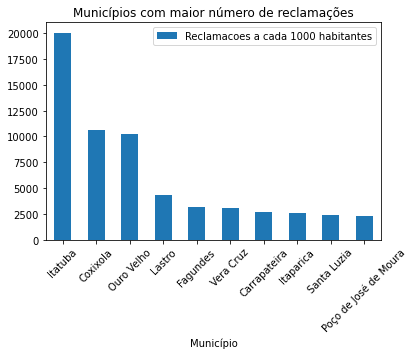

In [31]:
ax = df_normalizado.sort_values(by=[
    'Reclamacoes a cada 1000 habitantes'], ascending=False).head(10).plot.bar(
    x='Município', y='Reclamacoes a cada 1000 habitantes', rot=45,
    title="Municípios com maior número de reclamações")

In [28]:
df_SNIS_pop['Natureza Jurídica'].unique().shape

(47,)